LGA classifcation code:
Queensland: Cities (C), Shires (S), Towns (T) and Regional Councils (R)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


file = 'data/cleaned_data_schoolattendancerate.csv'

In [2]:
#read cleaned data
df1 = pd.read_csv(file)

df1.head()

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,Possible Attendance Days,Attendance Rate,Official Low Year Level,Official High Year Level,Suburb,Post Code,All Student Count,Longitude,Latitude
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,2103.0,94.5,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,1705.0,95.7,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,1440.0,97.6,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,1700.0,96.5,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,1728.0,95.9,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955


In [3]:
#check data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   School Code               6109 non-null   object 
 1   School                    6109 non-null   object 
 2   Attendance Year           6109 non-null   int64  
 3   School Type               6109 non-null   object 
 4   School Category           6109 non-null   object 
 5   Remoteness Area           6109 non-null   object 
 6   Region                    6109 non-null   object 
 7   Local Government Area     6109 non-null   object 
 8   State Electorate          6109 non-null   object 
 9   FTE Days Attended         6109 non-null   float64
 10  Possible Attendance Days  6109 non-null   float64
 11  Attendance Rate           6109 non-null   float64
 12  Official Low Year Level   6109 non-null   object 
 13  Official High Year Level  6109 non-null   object 
 14  Suburb  

In [4]:
#check at details
df1['School Code'].value_counts()

1394    5
3001    5
8       5
1900    5
925     5
       ..
A109    2
3036    2
A069    2
A068    2
A657    1
Name: School Code, Length: 1228, dtype: int64

In [5]:
#check at details
df1['Attendance Year'].value_counts()

2019    1228
2018    1226
2017    1222
2016    1218
2015    1215
Name: Attendance Year, dtype: int64

In [6]:
#check at details
df1['Local Government Area'].value_counts()

Brisbane (C)          911
Moreton Bay (R)       341
Gold Coast (C)        337
Toowoomba (R)         290
Logan (C)             257
                     ... 
Richmond (S)            5
Lockhart River (S)      5
Woorabinda (S)          5
Yarrabah (S)            5
Hope Vale (S)           1
Name: Local Government Area, Length: 74, dtype: int64

In [7]:
#check at details
df1['Region'].value_counts()

Metropolitan                1232
North Coast                 1088
Darling Downs South West    1030
Central Queensland           925
South East                   829
North Queensland             527
Far North Queensland         478
Name: Region, dtype: int64

In [8]:
#select interested data and form new dfs
df2 = df1.iloc[:,[2,6,7,11]]

df3 = df2.groupby(['Attendance Year','Region']).mean().reset_index()

df3

,Attendance Year,Region,Attendance Rate
0,2015,Central Queensland,92.442162
1,2015,Darling Downs South West,92.225728
2,2015,Far North Queensland,89.330526
3,2015,Metropolitan,92.614344
4,2015,North Coast,91.470233
5,2015,North Queensland,89.814286
6,2015,South East,91.481818
7,2016,Central Queensland,92.449730
8,2016,Darling Downs South West,92.077670
9,2016,Far North Queensland,89.190526


In [9]:
#change the view for plotting
df4 = pd.pivot_table(df3,values = 'Attendance Rate',index=['Attendance Year'],columns = ['Region']).reset_index()

df4

Region,Attendance Year,Central Queensland,Darling Downs South West,Far North Queensland,Metropolitan,North Coast,North Queensland,South East
0,2015,92.442162,92.225728,89.330526,92.614344,91.470233,89.814286,91.481818
1,2016,92.449730,92.077670,89.190526,92.858367,91.588940,89.531429,91.717576
2,2017,92.011351,91.860680,89.041667,92.700810,91.486697,89.307619,91.658182
3,2018,91.354054,91.500485,88.559375,92.025911,90.742009,88.788679,91.188024
4,2019,90.886486,91.176214,87.502083,91.579116,90.396347,87.700943,90.820958


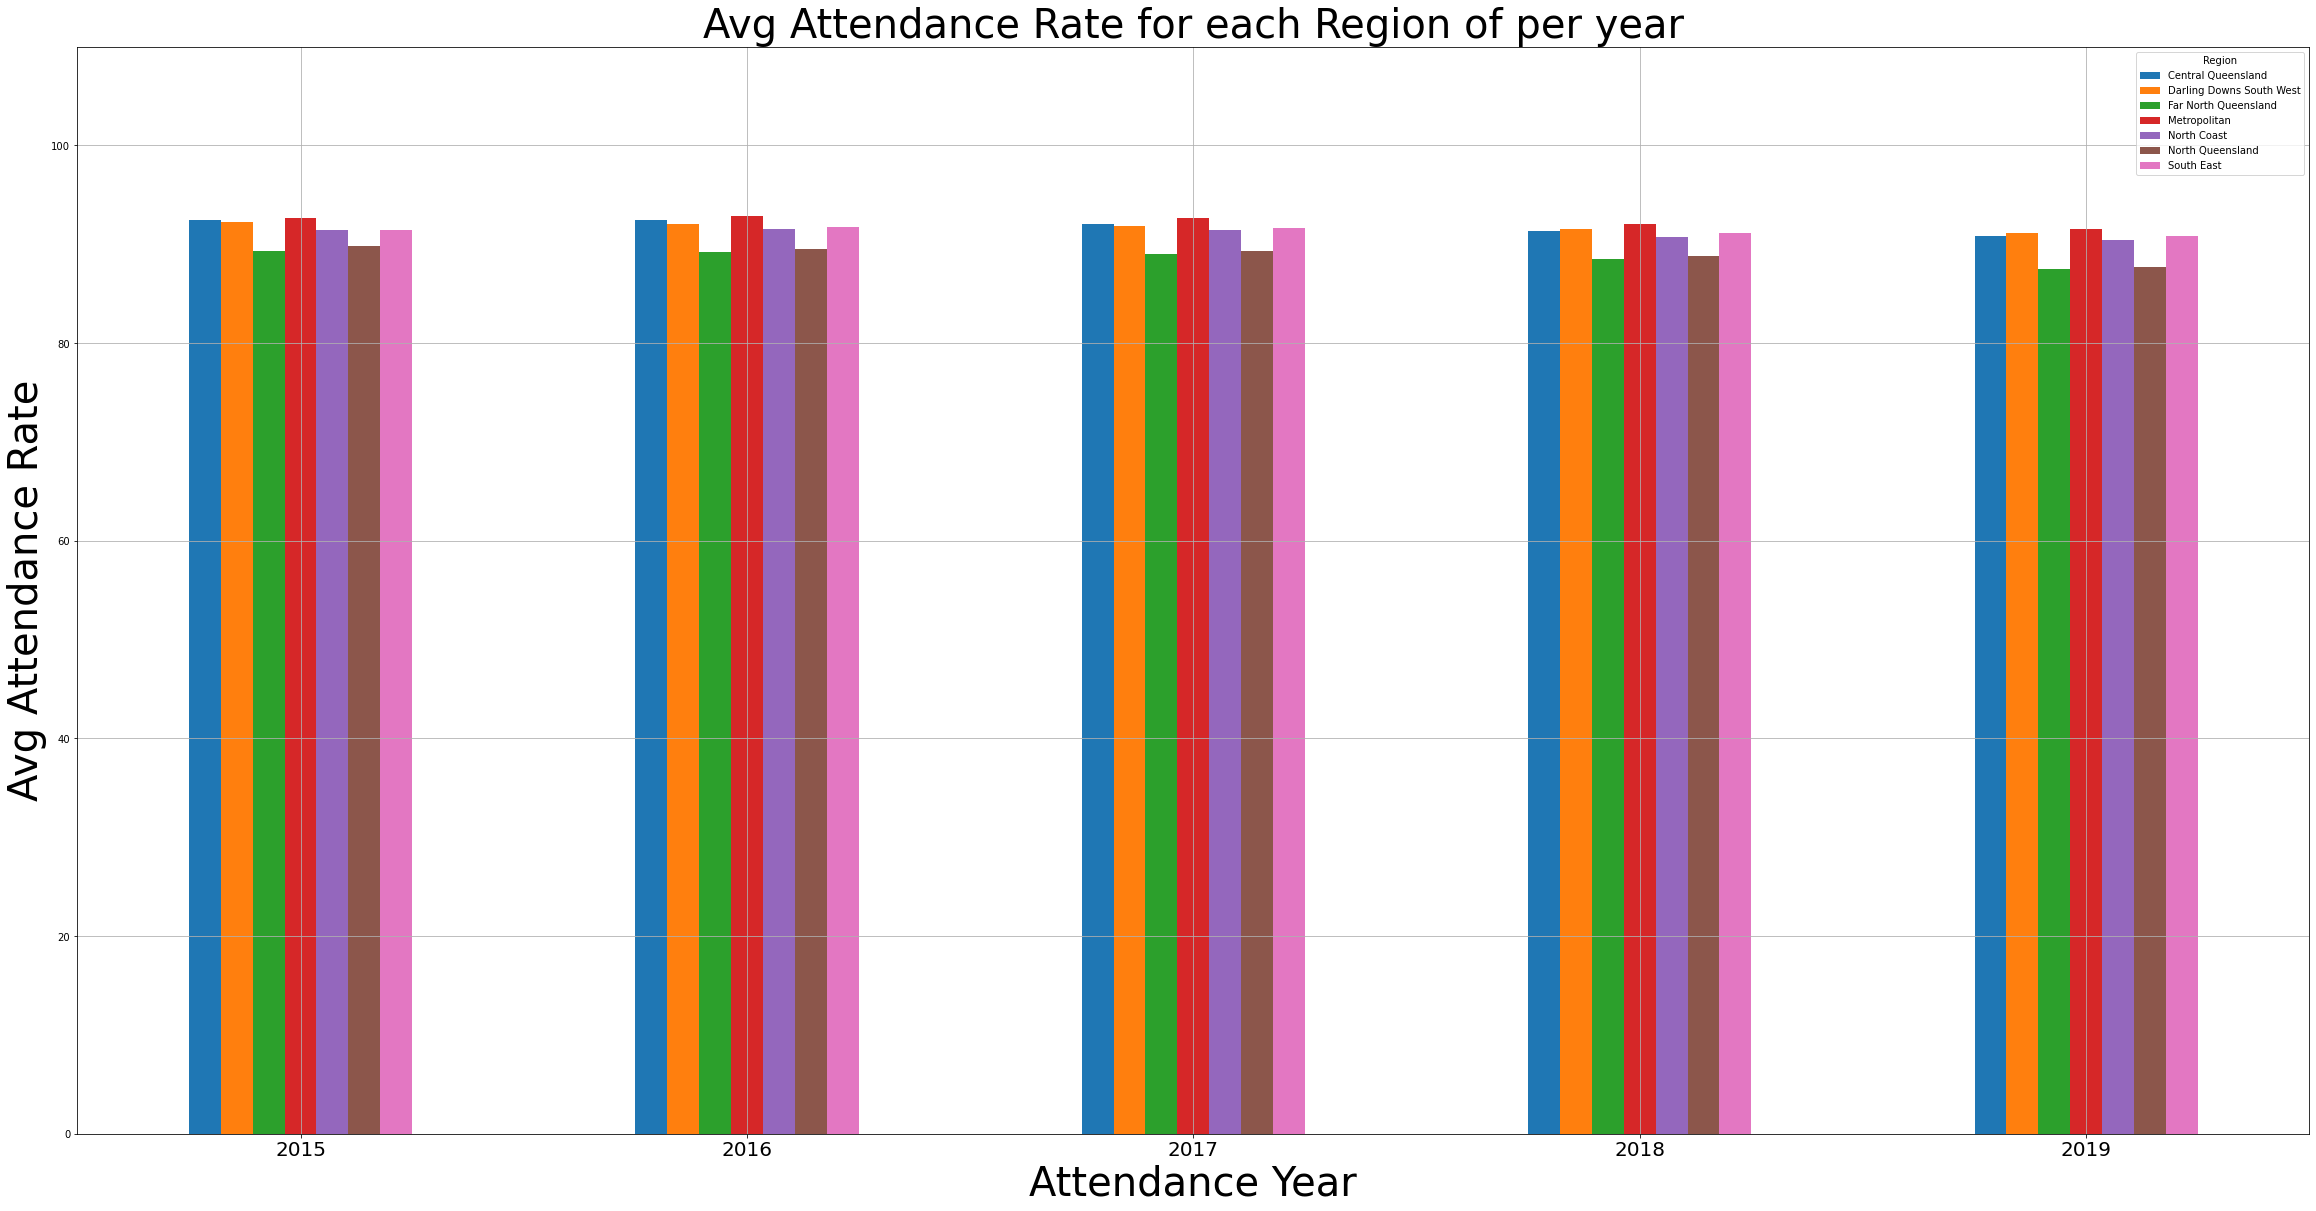

In [10]:
df4x = df4.set_index('Attendance Year')

barplot = df4x.plot(kind='bar',figsize=(40,20));

plt.title('Avg Attendance Rate for each Region of per year',fontsize=40)
plt.ylabel('Avg Attendance Rate',fontsize=40)
plt.xlabel('Attendance Year',fontsize=40)
plt.ylim(0,110)
barplot.set_xticklabels(df4x.index,rotation = 0,fontsize=20)

plt.grid()

plt.savefig('Part2.1a_Attendance Rate & Region_bar.png')

In [11]:
df4a = df2.groupby(['Attendance Year','Region'])['Attendance Rate'].count().reset_index()
df4a

,Attendance Year,Region,Attendance Rate
0,2015,Central Queensland,185
1,2015,Darling Downs South West,206
2,2015,Far North Queensland,95
3,2015,Metropolitan,244
4,2015,North Coast,215
5,2015,North Queensland,105
6,2015,South East,165
7,2016,Central Queensland,185
8,2016,Darling Downs South West,206
9,2016,Far North Queensland,95


In [12]:
df4b = pd.pivot_table(df4a,values = 'Attendance Rate',index=['Attendance Year'],columns = ['Region']).reset_index()

df4b

Region,Attendance Year,Central Queensland,Darling Downs South West,Far North Queensland,Metropolitan,North Coast,North Queensland,South East
0,2015,185,206,95,244,215,105,165
1,2016,185,206,95,245,217,105,165
2,2017,185,206,96,247,218,105,165
3,2018,185,206,96,247,219,106,167
4,2019,185,206,96,249,219,106,167


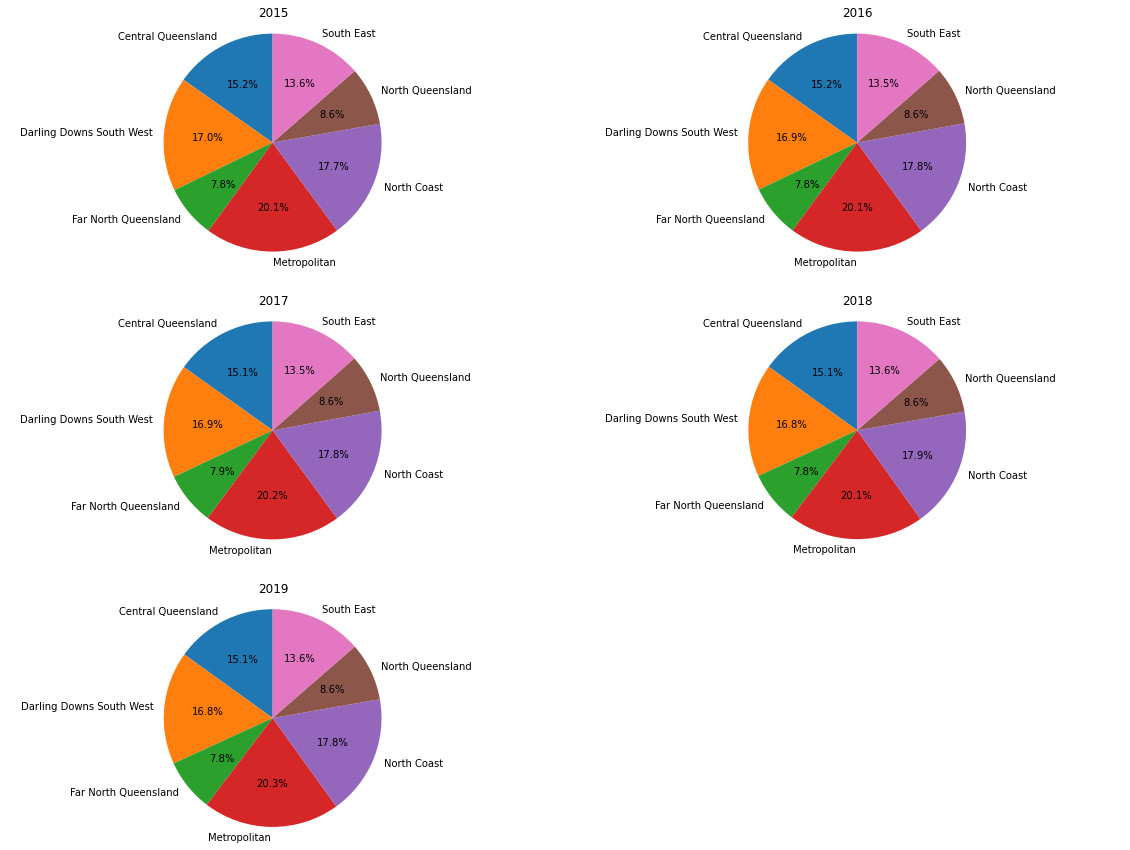

In [13]:
#plot multiple pie charts all together in one fig
def func(pct,abvalue):
    absolute = float(pct/100*np.sum(abvalue))
    return '{:.2f}%'.format(absolute)

fig, axes = plt.subplots(3,2,figsize=(20,15))

for i,(idx, row) in enumerate(df4b.set_index('Attendance Year').iterrows()):
    
    ax = axes[i//2,i%2]
    #row = row[row.gt(row.sum()*.01)]
    
    ax.pie(row,labels = row.index, autopct='%1.1f%%',startangle=90);
#     centre_circle = plt.Circle((0,0),0.7,fc='white')
#     fig=plt.gcf()
#     fig.gca().add_artist(centre_circle)
    ax.set_title(idx)
    
    ax.axis('equal')
    
    
    
    
    
axes[2,1].axis('off')
    
fig.subplots_adjust(wspace=0.1)



plt.savefig('Part2.1b_Attendance Rate & Region_pie.png')

In [14]:
#select interested data and form new dfs
df5 = df2.groupby(['Attendance Year','Local Government Area']).mean().reset_index()

df5

,Attendance Year,Local Government Area,Attendance Rate
0,2015,Aurukun (S),59.700000
1,2015,Balonne (S),89.066667
2,2015,Banana (S),93.092857
3,2015,Barcaldine (R),93.140000
4,2015,Barcoo (S),96.633333
...,...,...,...
361,2019,Western Downs (R),91.528571
362,2019,Whitsunday (R),91.261538
363,2019,Winton (S),87.800000
364,2019,Woorabinda (S),72.100000


In [15]:
#check out in details
df5['Local Government Area'].unique()

array(['Aurukun (S)', 'Balonne (S)', 'Banana (S)', 'Barcaldine (R)',
       'Barcoo (S)', 'Blackall Tambo (R)', 'Boulia (S)', 'Brisbane (C)',
       'Bulloo (S)', 'Bundaberg (R)', 'Burdekin (S)', 'Burke (S)',
       'Cairns (R)', 'Carpentaria (S)', 'Cassowary Coast (R)',
       'Central Highlands (R)', 'Charters Towers (R)', 'Cherbourg (S)',
       'Cloncurry (S)', 'Cook (S)', 'Croydon (S)', 'Diamantina (S)',
       'Doomadgee (S)', 'Douglas (S)', 'Etheridge (S)', 'Flinders (S)',
       'Fraser Coast (R)', 'Gladstone (R)', 'Gold Coast (C)',
       'Goondiwindi (R)', 'Gympie (R)', 'Hinchinbrook (S)', 'Ipswich (C)',
       'Isaac (R)', 'Kowanyama (S)', 'Livingstone (S)',
       'Lockhart River (S)', 'Lockyer Valley (R)', 'Logan (C)',
       'Longreach (R)', 'Mackay (R)', 'Maranoa (R)', 'Mareeba (S)',
       'McKinlay (S)', 'Moreton Bay (R)', 'Mornington (S)',
       'Mount Isa (C)', 'Murweh (S)', 'Noosa (S)', 'North Burnett (R)',
       'Northern Peninsula Area (R)', 'Palm Island (S)', '

In [16]:
#check out in details
len(df5['Local Government Area'].unique())

74

In [17]:
#change the view for plotting
df6 = pd.pivot_table(df5,values = 'Attendance Rate',index= ['Attendance Year'],
                     columns =['Local Government Area']).reset_index()

df6

Local Government Area,Attendance Year,Aurukun (S),Balonne (S),Banana (S),Barcaldine (R),Barcoo (S),Blackall Tambo (R),Boulia (S),Brisbane (C),Bulloo (S),...,Tablelands (R),Toowoomba (R),Torres (S),Townsville (C),Weipa (T),Western Downs (R),Whitsunday (R),Winton (S),Woorabinda (S),Yarrabah (S)
0,2015,59.7,89.066667,93.092857,93.14,96.633333,92.60,78.05,92.995604,92.9,...,90.569231,92.936207,87.5,90.502857,81.6,92.732143,91.438462,90.5,86.6,67.6
1,2016,47.8,90.416667,93.242857,93.72,92.633333,89.80,90.25,93.290659,91.4,...,90.669231,92.786207,89.0,90.282857,82.9,92.482143,91.846154,92.1,85.0,67.1
2,2017,55.9,90.350000,92.750000,91.70,91.366667,90.75,84.45,93.095604,94.6,...,90.869231,92.805172,87.8,90.160000,82.4,92.067857,91.846154,93.3,89.7,62.7
3,2018,53.9,87.116667,91.942857,89.92,90.333333,90.15,90.35,92.462088,92.5,...,90.084615,92.325862,86.7,89.500000,78.6,91.332143,91.600000,91.5,81.2,61.4
4,2019,42.5,88.833333,92.071429,90.86,86.733333,88.20,88.70,92.099454,89.2,...,89.292308,92.353448,85.8,88.361111,79.6,91.528571,91.261538,87.8,72.1,62.3


In [18]:
#remove nan value and show the rest
df6 = df6.dropna(axis=1)

df6.columns

Index(['Attendance Year', 'Aurukun (S)', 'Balonne (S)', 'Banana (S)',
       'Barcaldine (R)', 'Barcoo (S)', 'Blackall Tambo (R)', 'Boulia (S)',
       'Brisbane (C)', 'Bulloo (S)', 'Bundaberg (R)', 'Burdekin (S)',
       'Burke (S)', 'Cairns (R)', 'Carpentaria (S)', 'Cassowary Coast (R)',
       'Central Highlands (R)', 'Charters Towers (R)', 'Cherbourg (S)',
       'Cloncurry (S)', 'Cook (S)', 'Croydon (S)', 'Diamantina (S)',
       'Doomadgee (S)', 'Douglas (S)', 'Etheridge (S)', 'Flinders (S)',
       'Fraser Coast (R)', 'Gladstone (R)', 'Gold Coast (C)',
       'Goondiwindi (R)', 'Gympie (R)', 'Hinchinbrook (S)', 'Ipswich (C)',
       'Isaac (R)', 'Kowanyama (S)', 'Livingstone (S)', 'Lockhart River (S)',
       'Lockyer Valley (R)', 'Logan (C)', 'Longreach (R)', 'Mackay (R)',
       'Maranoa (R)', 'Mareeba (S)', 'McKinlay (S)', 'Moreton Bay (R)',
       'Mornington (S)', 'Mount Isa (C)', 'Murweh (S)', 'Noosa (S)',
       'North Burnett (R)', 'Northern Peninsula Area (R)', 'Palm Is

In [19]:
#change the column order to have a better view of plot later
df6 = df6[['Attendance Year',
           'Aurukun (S)','Balonne (S)','Banana (S)','Barcoo (S)','Boulia (S)','Bulloo (S)','Burdekin (S)',
           'Burke (S)','Carpentaria (S)','Cherbourg (S)','Cloncurry (S)','Cook (S)','Croydon (S)','Diamantina (S)',
           'Doomadgee (S)','Douglas (S)','Etheridge (S)','Flinders (S)','Hinchinbrook (S)','Kowanyama (S)','Livingstone (S)',
           'Lockhart River (S)','Mareeba (S)','McKinlay (S)','Mornington (S)','Murweh (S)','Noosa (S)','Palm Island (S)',
           'Paroo (S)','Pormpuraaw (S)','Quilpie (S)','Richmond (S)','Torres (S)','Winton (S)','Woorabinda (S)',
           'Yarrabah (S)',
           'Barcaldine (R)','Blackall Tambo (R)','Bundaberg (R)','Cairns (R)','Cassowary Coast (R)','Central Highlands (R)', 'Charters Towers (R)',
           'Fraser Coast (R)','Gladstone (R)','Goondiwindi (R)','Gympie (R)','Isaac (R)','Lockyer Valley (R)','Longreach (R)',
           'Mackay (R)','Maranoa (R)','Moreton Bay (R)','North Burnett (R)','Northern Peninsula Area (R)','Rockhampton (R)','Scenic Rim (R)',
           'Somerset (R)','South Burnett (R)','Southern Downs (R)','Sunshine Coast (R)','Tablelands (R)','Toowoomba (R)','Western Downs (R)',
           'Whitsunday (R)',
           'Brisbane (C)','Gold Coast (C)','Ipswich (C)','Logan (C)','Mount Isa (C)','Redland (C)','Townsville (C)',
           'Weipa (T)']]

df6

Local Government Area,Attendance Year,Aurukun (S),Balonne (S),Banana (S),Barcoo (S),Boulia (S),Bulloo (S),Burdekin (S),Burke (S),Carpentaria (S),...,Western Downs (R),Whitsunday (R),Brisbane (C),Gold Coast (C),Ipswich (C),Logan (C),Mount Isa (C),Redland (C),Townsville (C),Weipa (T)
0,2015,59.7,89.066667,93.092857,96.633333,78.05,92.9,92.460000,85.6,84.95,...,92.732143,91.438462,92.995604,91.853731,90.941860,90.411765,86.988889,91.591304,90.502857,81.6
1,2016,47.8,90.416667,93.242857,92.633333,90.25,91.4,91.213333,79.6,79.90,...,92.482143,91.846154,93.290659,92.158209,91.204545,90.723529,86.877778,91.891304,90.282857,82.9
2,2017,55.9,90.350000,92.750000,91.366667,84.45,94.6,91.066667,80.0,81.90,...,92.067857,91.846154,93.095604,92.011940,91.126087,90.847059,87.877778,91.713043,90.160000,82.4
3,2018,53.9,87.116667,91.942857,90.333333,90.35,92.5,90.266667,77.0,80.70,...,91.332143,91.600000,92.462088,91.704412,90.213043,90.136538,86.555556,91.378261,89.500000,78.6
4,2019,42.5,88.833333,92.071429,86.733333,88.70,89.2,90.253333,77.0,80.05,...,91.528571,91.261538,92.099454,91.514706,89.412766,89.690385,83.711111,91.026087,88.361111,79.6


In [20]:
#change the view of dataframe
df7 = df6.groupby(df6['Attendance Year']).first()

df8 = df7.T

df8

Attendance Year,2015,2016,2017,2018,2019
Local Government Area,,,,,
Aurukun (S),59.700000,47.800000,55.900000,53.900000,42.500000
Balonne (S),89.066667,90.416667,90.350000,87.116667,88.833333
Banana (S),93.092857,93.242857,92.750000,91.942857,92.071429
Barcoo (S),96.633333,92.633333,91.366667,90.333333,86.733333
Boulia (S),78.050000,90.250000,84.450000,90.350000,88.700000
...,...,...,...,...,...
Logan (C),90.411765,90.723529,90.847059,90.136538,89.690385
Mount Isa (C),86.988889,86.877778,87.877778,86.555556,83.711111
Redland (C),91.591304,91.891304,91.713043,91.378261,91.026087


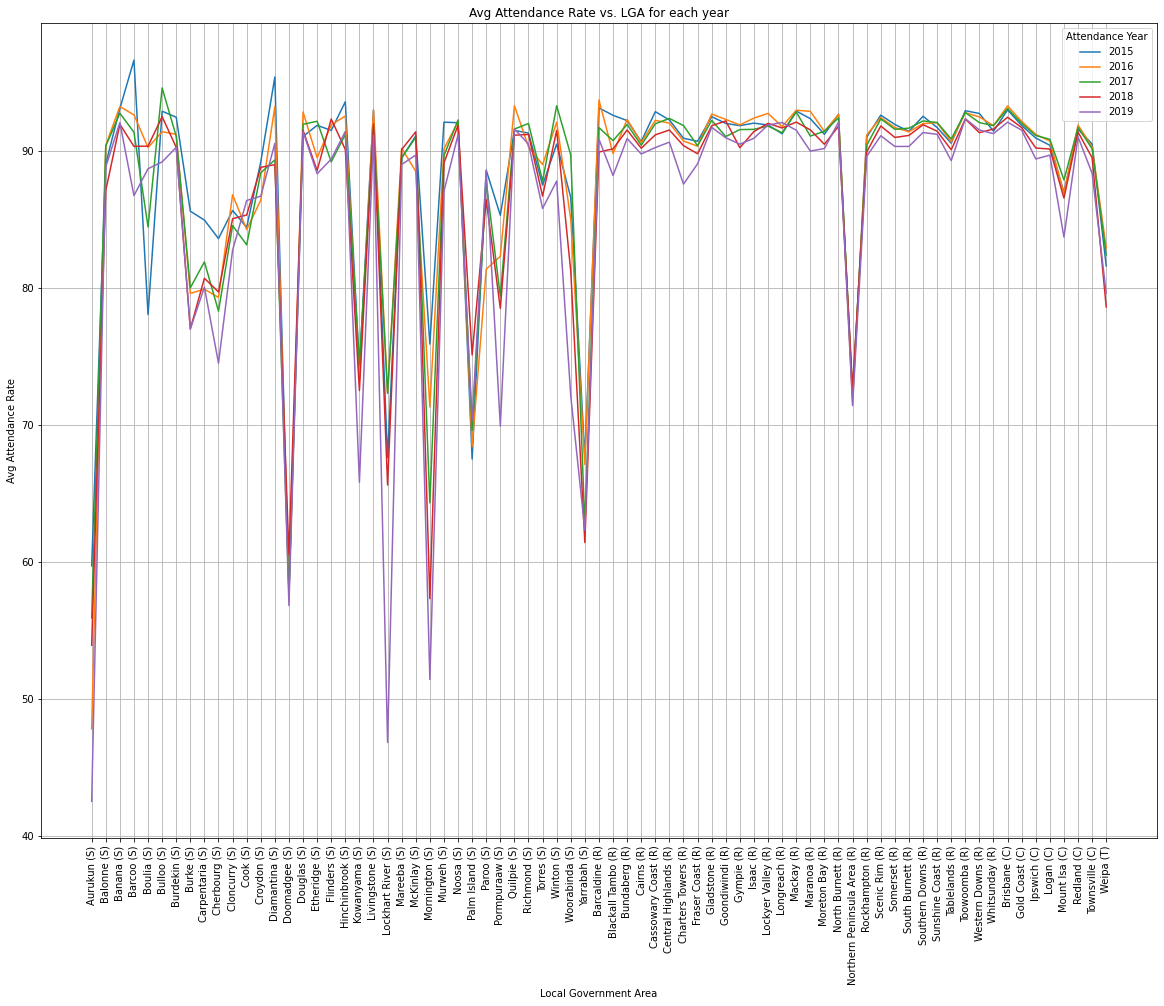

In [21]:
#set line plot
df8.plot(kind='line',figsize=(20,15));

x_axis = np.arange(0,73,1)

tick_location = [value for value in x_axis]
plt.xticks(tick_location,list(df8.index),rotation='vertical')

plt.ylabel('Avg Attendance Rate')
plt.title('Avg Attendance Rate vs. LGA for each year')

plt.grid()

plt.savefig('Part2.2_Attendance Rate & LGA_line.png')